Una vez que ya hemos realizado la limpieza de los datos  y hemos dejado todo preparado para la realizacion de las futuras predicciones. el objeto de nuestras prediciones sera el de averiguar si habra algun tipo de problemas futuro, es decir, si el cliente se queda satisfecho con la contestacion o gestion de la empresa o, si por el contrario el cliente decide ir mas alla y presentar una queja/ reclamacion ante las autoridades. 

Para realizar esto vamos a quitar los que en el timely response se corresponden con "En proceso" y los dejaremos para posteriormente intentar predecir en que va a acabar. 

In [3]:
# importamos el dataframe ya con todo codificado. 
import sys
sys.path.append('../src')
import preprocessing
# aunque para hacer lo queriamos con el timely response vamos a tener que separar los 

In [4]:
df=preprocessing.transform()
main_df=preprocessing.main_df_fun()

In [5]:
df[0]

,Complaint ID,Product,Sub-product,Issue,State,ZIP code,Date received,Company,Company response,Timely response?,Consumer disputed?,mes
0,1291006,4,1.0,23,50,76119.0,0,1066,4,True,NaN,3
1,1290580,4,1.0,24,50,77479.0,0,50,1,True,NaN,3
2,1290564,6,2.0,7,23,2127.0,0,1115,1,True,1.0,3
3,1291615,2,4.0,63,7,92592.0,0,964,4,True,NaN,3
4,1292165,4,3.0,24,40,43068.0,0,1397,4,True,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,4,3.0,24,50,75201.0,1,488,3,True,0.0,1
28152,1178183,1,8.0,80,13,30043.0,6,458,1,True,NaN,1
28153,1178182,6,12.0,55,28,55105.0,1,1154,3,True,0.0,1
28154,1178181,8,2.0,17,7,92509.0,6,901,1,True,NaN,1


In [11]:
df[1]

Processing column  12 / 12


,,,,,,,,,,,,


Ahora vamos a aplicar tecnicas de ML para predecir el posible resultado, se utilizaran cuantas mas mejor y se aplicaran tecnicas de pipeline, votacion de algotirmos etc. para saber cual es el mejor y en funcion a eso se entrenara un modelo. 
Se intentara si es posible aplicar Redes neuronales para clasificar. 


In [6]:
# nos desaremos del complaint ID ya que realmente no nos aporta informacion adicional, simplemente es el numero de entrada. 
# separaremos las partes de entrenamiento y las partes de test.

df=preprocessing.transform(id=True)[0]

In [7]:
df

,Product,Sub-product,Issue,State,ZIP code,Date received,Company,Company response,Timely response?,Consumer disputed?,mes
0,4,1.0,23,50,76119.0,0,1066,4,True,NaN,3
1,4,1.0,24,50,77479.0,0,50,1,True,NaN,3
2,6,2.0,7,23,2127.0,0,1115,1,True,1.0,3
3,2,4.0,63,7,92592.0,0,964,4,True,NaN,3
4,4,3.0,24,40,43068.0,0,1397,4,True,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...
28151,4,3.0,24,50,75201.0,1,488,3,True,0.0,1
28152,1,8.0,80,13,30043.0,6,458,1,True,NaN,1
28153,6,12.0,55,28,55105.0,1,1154,3,True,0.0,1
28154,8,2.0,17,7,92509.0,6,901,1,True,NaN,1


<Axes: >

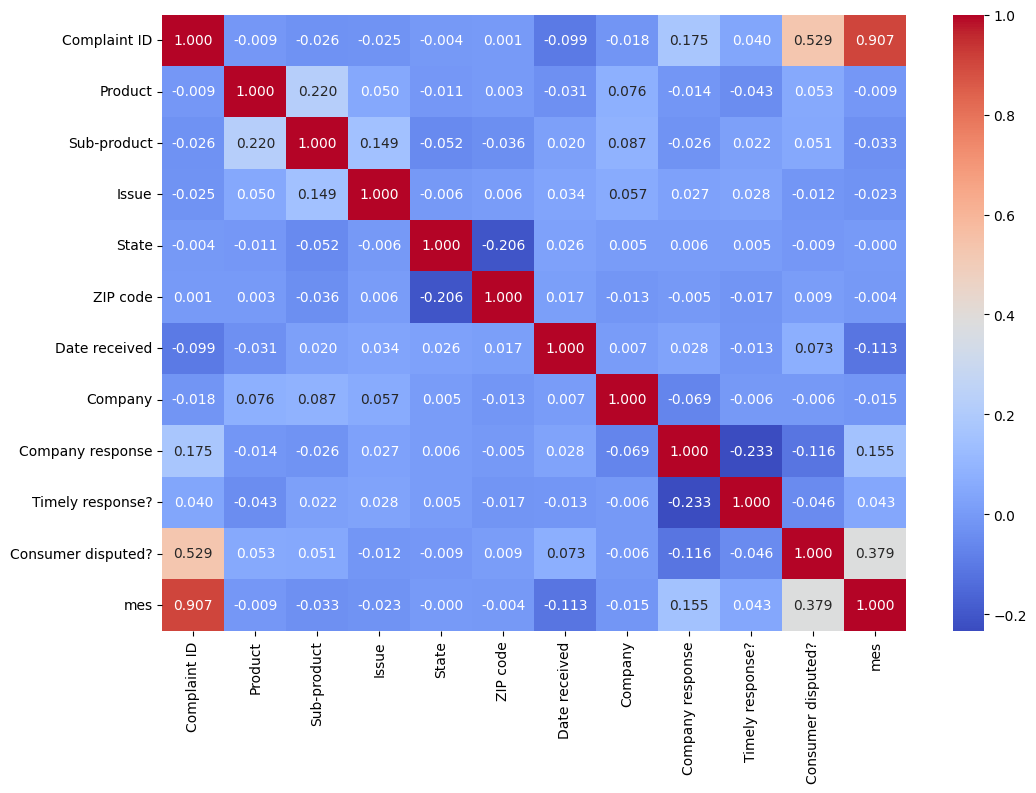

In [2]:
import fuentes as ft
df=ft.preprocessing.transform()[0]

ft.plt.figure(figsize=(12, 8))
ft.sns.heatmap(df.corr(),annot=True, fmt=".3f", cmap="coolwarm")

In [ ]:
df.corr()

,Product,Sub-product,Issue,State,ZIP code,Date received,Company,Company response,Timely response?,Consumer disputed?,mes
Product,1.000000,0.220401,0.049843,-0.010726,0.002557,-0.031109,0.076287,-0.014252,-0.043101,0.053018,-0.009311
Sub-product,0.220401,1.000000,0.148577,-0.051956,-0.036275,0.019904,0.086871,-0.025877,0.021790,0.051789,-0.032983
Issue,0.049843,0.148577,1.000000,-0.005821,0.005735,0.033710,0.056931,0.027065,0.028430,-0.012408,-0.022740
State,-0.010726,-0.051956,-0.005821,1.000000,-0.205560,0.026294,0.004816,0.005752,0.005238,-0.008538,-0.000007
ZIP code,0.002557,-0.036275,0.005735,-0.205560,1.000000,0.016888,-0.013355,-0.005171,-0.017161,0.009280,-0.004185
Date received,-0.031109,0.019904,0.033710,0.026294,0.016888,1.000000,0.006534,0.028021,-0.013493,0.072977,-0.112504
Company,0.076287,0.086871,0.056931,0.004816,-0.013355,0.006534,1.000000,-0.068682,-0.006358,-0.006200,-0.015387
Company response,-0.014252,-0.025877,0.027065,0.005752,-0.005171,0.028021,-0.068682,1.000000,-0.232751,-0.116118,0.155500
Timely response?,-0.043101,0.021790,0.028430,0.005238,-0.017161,-0.013493,-0.006358,-0.232751,1.000000,-0.046153,0.043441
Consumer disputed?,0.053018,0.051789,-0.012408,-0.008538,0.009280,0.072977,-0.006200,-0.116118,-0.046153,1.000000,0.379132


Una vez analizadas las columnas vemos que ninguna contiene una informacion que sea determinante a la hora de dilucidar si la respuesta final del cliente sera positiva o negativa. 
no obstante,haremos un esfuerzo para ello. 


In [ ]:
# primero prepararemos los datos, antes de iniciar el entrenamiento de modelos tenemos que realizar una estarizacion para obtener el resultado deseado. 
# no se han quietado los datos extraños referentes a los dias en los que la compañia de recepcion de llamada pasa las mismas. 


In [4]:
import fuentes as ft 

main_df=ft.preprocessing.main_df_fun()[0]

In [5]:
ft.skrub.TableReport(main_df[main_df["Company response"]=="In progress"])

Processing column  14 / 14


,,,,,,,,,,,,,,


<Axes: >

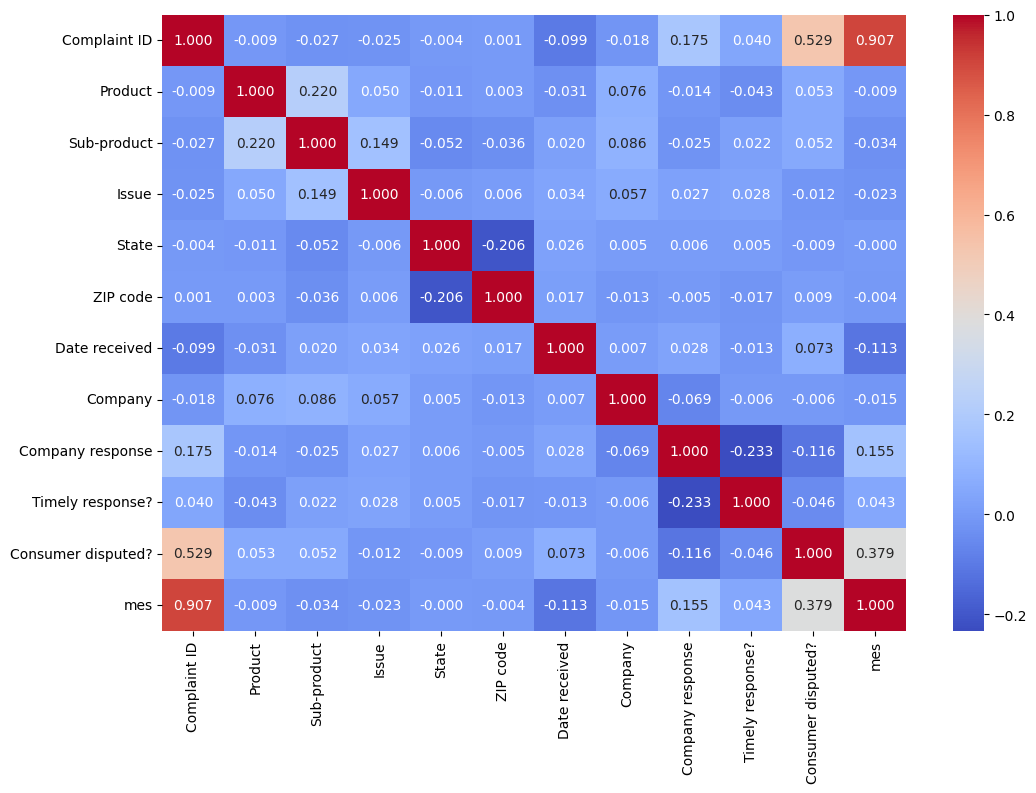

In [6]:
df=ft.preprocessing.transform()[0]
ft.plt.figure(figsize=(12, 8))
ft.sns.heatmap(df.corr(),annot=True, fmt=".3f", cmap="coolwarm")

In [7]:
# una vez visto lo que hay vamos a proceder a separar lo que va a ser util para el entrenamiento y lo que será util para el testeo. 
df=ft.preprocessing.transform()[0]

# cogemos solo las filas que tienen toda la informacion.
temp=df[df["Consumer disputed?"].notna()]
para_predecir=df[df["Consumer disputed?"].isna()]

# miramos el desbalance de las muestras que nos quedan
temp["Consumer disputed?"].value_counts()



Consumer disputed?
1.0    4691
0.0    1289
Name: count, dtype: int64

In [ ]:
# aqui nos encontramos con el problema del balanceo de muestras. donde tenemos muchos mas Yes que No.
# tenemos un total bajo de posibilidades. 

In [8]:
# partimos el df en el objetivo que sera la columna a predecir y, por otro lado, el resto de parametros posibles.
# usamos la opcion sample para realizar un barajado de las filas.
temp=temp.sample(frac=1)
X=temp.drop("Consumer disputed?",axis=1)
y=temp["Consumer disputed?"]

In [9]:
# partimos el data frame en varias partes para hacer el estudio
X_train, X_test, y_train, y_test = ft.train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state=55)


In [ ]:
# una vez realizado este cambio vamos a ver los pipelines y la votacion de algoritmos.

import fuentes as ft



In [10]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm

# Set random seed
np.random.seed(0)

pipe = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier())
])

logistic_params = {
    'classifier': [LogisticRegression(max_iter=1000, solver='liblinear'), LogisticRegression(max_iter=100, solver='liblinear')],
    'classifier__penalty': ['l1', 'l2'] # regularizaciones ridge, lasso y elasticnet
}

random_forest_params = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [2,3,4] #cantidad maxima de bifurcaciones que tiene nuestro arbol
}

svm_param = {
    'classifier': [svm.SVC(probability=True)],
    'classifier__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
}

search_space = [
    logistic_params,
    random_forest_params,
    svm_param
]

clf = GridSearchCV(estimator = pipe,
                  param_grid = search_space,
                  cv = 5,
                  n_jobs=-1,
                  verbose=False)

In [11]:
clf.fit(X_train, y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"[{'classifier': [LogisticRegre...r='liblinear'), LogisticRegre...r='liblinear')], 'classifier__penalty': ['l1', 'l2']}, {'classifier': [RandomForestClassifier()], 'classifier__max_depth': [2, 3, ...], 'scaler': [StandardScaler(), MinMaxScaler()]}, ...]"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,False
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [12]:
print(clf.best_estimator_)
print(clf.best_score_)
print(clf.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])
0.8653852039366395
{'classifier': LogisticRegression(max_iter=1000, solver='liblinear'), 'classifier__penalty': 'l2'}


In [13]:
clf.best_estimator_.predict(X_test)

array([1., 1., 1., ..., 1., 0., 0.])

In [14]:
clf.best_estimator_.score(X_test,y_test)

0.8612040133779264